# Data Preprocessing Tools

## Importing the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import sqrt, argmax
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, classification_report, roc_auc_score, roc_curve
# from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

## Importing the dataset

In [17]:
dataset = pd.read_csv('term-deposit-marketing-2020.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


## Encoding categorical data

In [18]:
dataset['y'] = dataset['y'].map(lambda x: 0 if x == 'no' else 1)
dataset['default'] = dataset['default'].map(lambda x: 0 if x == 'no' else 1)
dataset['housing'] = dataset['housing'].map(lambda x: 0 if x == 'no' else 1)
dataset['loan'] = dataset['loan'].map(lambda x: 0 if x == 'no' else 1)

In [19]:
dataset.describe()

,age,default,balance,housing,loan,day,duration,campaign,y
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,0.020225,1274.277550,0.600775,0.173250,16.017225,254.824300,2.882175,0.072400
std,9.641776,0.140771,2903.769716,0.489745,0.378468,8.278127,259.366498,3.239051,0.259152
min,19.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,0.000000,54.000000,0.000000,0.000000,8.000000,100.000000,1.000000,0.000000
50%,39.000000,0.000000,407.000000,1.000000,0.000000,17.000000,175.000000,2.000000,0.000000
75%,48.000000,0.000000,1319.000000,1.000000,0.000000,21.000000,313.000000,3.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,1.000000


In [20]:
print(dataset.head())

print(dataset.info())

print(dataset['y'].value_counts())

   age           job  marital  education  default  balance  housing  loan   
0   58    management  married   tertiary        0     2143        1     0  \
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day month  duration  campaign  y  
0  unknown    5   may       261         1  0  
1  unknown    5   may       151         1  0  
2  unknown    5   may        76         1  0  
3  unknown    5   may        92         1  0  
4  unknown    5   may       198         1  0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-nul

In [21]:
categorical_columns_subset = [
    "job",
    "marital",
    "education",
    "contact",
    "month"
    ]

numerical_columns_subset = [
    "age",
    "default",
    "balance",
    "housing",
    "loan",
    "day",
    "duration",
    "campaign","y"
    ]


In [22]:
X = dataset[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

categorical_columns = X.select_dtypes(include="category").columns
n_categorical_features = len(categorical_columns)
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

Number of samples: 40000
Number of features: 14
Number of categorical features: 5
Number of numerical features: 9


In [23]:
X.head()

,job,marital,education,contact,month,age,default,balance,housing,loan,day,duration,campaign,y
0,management,married,tertiary,unknown,may,58,0,2143,1,0,5,261,1,0
1,technician,single,secondary,unknown,may,44,0,29,1,0,5,151,1,0
2,entrepreneur,married,secondary,unknown,may,33,0,2,1,1,5,76,1,0
3,blue-collar,married,unknown,unknown,may,47,0,1506,1,0,5,92,1,0
4,unknown,single,unknown,unknown,may,33,0,1,0,0,5,198,1,0


In [24]:
features = X.drop(columns=['y'])
y = dataset.iloc[:, -1]

In [25]:
print(features.head(), y.head(), features.shape, y.shape)

            job  marital  education  contact month  age  default  balance   
0    management  married   tertiary  unknown   may   58        0     2143  \
1    technician   single  secondary  unknown   may   44        0       29   
2  entrepreneur  married  secondary  unknown   may   33        0        2   
3   blue-collar  married    unknown  unknown   may   47        0     1506   
4       unknown   single    unknown  unknown   may   33        0        1   

   housing  loan  day  duration  campaign  
0        1     0    5       261         1  
1        1     0    5       151         1  
2        1     1    5        76         1  
3        1     0    5        92         1  
4        0     0    5       198         1   0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64 (40000, 13) (40000,)


##**Creating Histogram**

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'default'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'housing'}>],
       [<Axes: title={'center': 'loan'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>]], dtype=object)

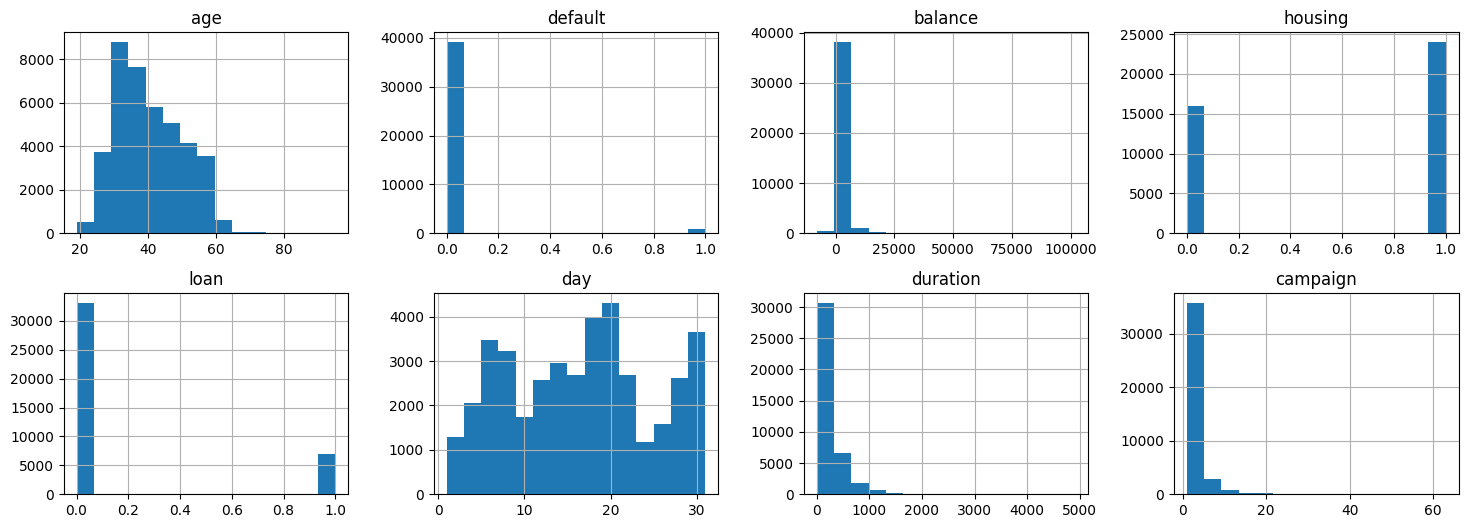

In [26]:
features.hist(bins=15, figsize=(18, 6), layout=(2, 4))

No huge correlation impact that affect the target results or perdictions

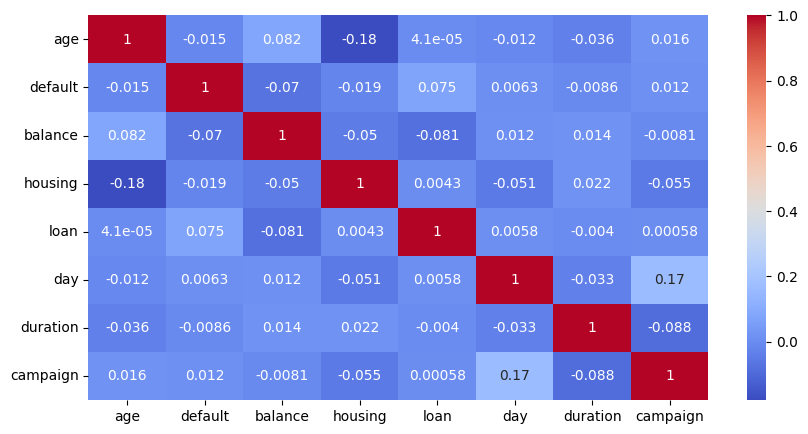

In [27]:
plt.figure(figsize = (10,5))
sns.heatmap(features.select_dtypes(include="number").corr(), annot = True, cmap="coolwarm")
plt.show()

y
0    37104
1     2896
Name: count, dtype: int64


<Axes: ylabel='count'>

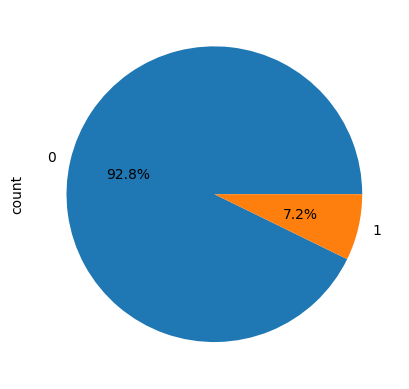

In [28]:
print(y.value_counts())

y.value_counts().plot(kind='pie', autopct='%1.1f%%')

##**Encoding the Dependent Variable**

In [29]:
ct = make_column_transformer(
    (OneHotEncoder(), make_column_selector(dtype_include="category")), remainder="passthrough")
features = ct.fit_transform(features)

In [30]:
features = pd.DataFrame(features)
print(features.head())
features.shape

    0    1    2    3    4    5    6    7    8    9   ...   31   32    33   34   
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  58.0  0.0  \
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  44.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  33.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  47.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  33.0  0.0   

       35   36   37   38     39   40  
0  2143.0  1.0  0.0  5.0  261.0  1.0  
1    29.0  1.0  0.0  5.0  151.0  1.0  
2     2.0  1.0  1.0  5.0   76.0  1.0  
3  1506.0  1.0  0.0  5.0   92.0  1.0  
4     1.0  0.0  0.0  5.0  198.0  1.0  

[5 rows x 41 columns]


(40000, 41)

## Splitting the dataset into the Training set and Test set

In [31]:
X_train, X_test,  y_train, y_test = train_test_split(features, y.values, test_size = 0.2, random_state = 1)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32000, 41) (8000, 41) (32000,) (8000,)


In [33]:
X_train= pd.DataFrame(X_train)
print(X_train.head())
X_train.shape

        0    1    2    3    4    5    6    7    8    9   ...   31   32    33   
21721  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0  \
15576  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  41.0   
28716  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  27.0   
204    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  35.0   
36677  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  46.0   

        34     35   36   37    38     39   40  
21721  0.0  268.0  0.0  0.0  19.0  255.0  1.0  
15576  0.0   98.0  0.0  1.0  21.0   97.0  6.0  
28716  0.0  116.0  0.0  0.0  30.0   46.0  1.0  
204    0.0    0.0  1.0  0.0   5.0  471.0  1.0  
36677  0.0  147.0  1.0  0.0  12.0  189.0  1.0  

[5 rows x 41 columns]


(32000, 41)

In [34]:
X_test = pd.DataFrame(X_test)
print(X_test.head())
X_test.shape

        0    1    2    3    4    5    6    7    8    9   ...   31   32    33   
3841   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  57.0  \
12898  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  49.0   
15032  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  37.0   
36781  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0   
9201   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  40.0   

        34      35   36   37    38     39   40  
3841   0.0   260.0  1.0  0.0  16.0   38.0  3.0  
12898  1.0  -354.0  0.0  1.0   7.0  455.0  1.0  
15032  1.0     0.0  1.0  0.0  17.0  158.0  1.0  
36781  0.0   177.0  1.0  1.0  12.0   22.0  8.0  
9201   0.0  1779.0  1.0  0.0   5.0   59.0  7.0  

[5 rows x 41 columns]


(8000, 41)

##**Dummy Classifier**

In [35]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(y_dummy_pred)))

# checking accuracy
print('Test score: {:.2f} %'.format(accuracy_score(y_test, y_dummy_pred)*100))

Unique predicted labels:  [0 1]
Test score: 86.78 %


In [36]:
print('F1_score: {:.2f} %'.format(f1_score(y_test, y_dummy_pred)*100))

F1_score: 7.03 %


In [37]:
pd.DataFrame(confusion_matrix(y_test, y_dummy_pred))

,0,1
0,6902,533
1,525,40


In [38]:
y_pred_proba = dummy.predict_proba(X_test)

In [39]:
print(pd.DataFrame(y_pred_proba))

        0    1
0     1.0  0.0
1     1.0  0.0
2     1.0  0.0
3     1.0  0.0
4     1.0  0.0
...   ...  ...
7995  1.0  0.0
7996  0.0  1.0
7997  1.0  0.0
7998  1.0  0.0
7999  1.0  0.0

[8000 rows x 2 columns]


#**Modeling and selection**

##**Logistic Regression**

In [40]:
lg = LogisticRegression(solver='newton-cg')
lg.fit(X_train, y_train)

y_pred_lg = lg.predict(X_test)

print(y_pred_lg)
print('Test score: {:.2f} %'.format(accuracy_score(y_test, y_pred_lg)*100))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[0 0 0 ... 0 0 0]
Test score: 93.75 %


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [41]:
predictions = pd.DataFrame(y_pred_lg)
predictions[0].value_counts()

0
0    7739
1     261
Name: count, dtype: int64

In [42]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7435
           1       0.62      0.29      0.39       565

    accuracy                           0.94      8000
   macro avg       0.79      0.64      0.68      8000
weighted avg       0.93      0.94      0.93      8000



In [43]:
print('F1_score: {:.2f} %'.format(f1_score(y_test, y_pred_lg)*100))

F1_score: 39.47 %


In [44]:
print('Recall: {:.2f} %'.format(recall_score(y_test, y_pred_lg)*100))

Recall: 28.85 %


In [45]:
pd.DataFrame(confusion_matrix(y_test,y_pred_lg))

,0,1
0,7337,98
1,402,163


In [46]:
y_pred_proba_lg = lg.predict_proba(X_test)

In [47]:
print(pd.DataFrame(y_pred_proba_lg))

             0         1
0     0.998595  0.001405
1     0.943514  0.056486
2     0.985445  0.014555
3     0.989305  0.010695
4     0.996165  0.003835
...        ...       ...
7995  0.961502  0.038498
7996  0.974109  0.025891
7997  0.981463  0.018537
7998  0.982378  0.017622
7999  0.955205  0.044795

[8000 rows x 2 columns]


In [48]:
params = {'C':[0.1,0.01,0.02,0.3,0.0015,1], 'solver':["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}
grid_search_lg = GridSearchCV(estimator= lg, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_lg.fit(X_train, y_train)
best_accuracy_lg = grid_search_lg.best_score_
best_params_lg = grid_search_lg.best_params_
print("Best F1_Score for Logistisc regression: {:.2f}%".format(best_accuracy_lg*100))
print("Best params for Logistisc regression: ",best_params_lg)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best F1_Score for Logistisc regression: 38.04%
Best params for Logistisc regression:  {'C': 1, 'solver': 'newton-cholesky'}



##**RandomForest Classifier**

In [49]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, rfc_pred)*100))

Accuracy score: 93.67 %


In [50]:
print('F1_score: {:.2f} %'.format(f1_score(y_test, rfc_pred)*100))

F1_score: 40.33 %


In [51]:
print('Recall: {:.2f} %'.format(recall_score(y_test, rfc_pred)*100))

Recall: 30.27 %


In [52]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7435
           1       0.60      0.30      0.40       565

    accuracy                           0.94      8000
   macro avg       0.78      0.64      0.68      8000
weighted avg       0.92      0.94      0.93      8000



In [53]:
pd.DataFrame(confusion_matrix(y_test,rfc_pred))

,0,1
0,7323,112
1,394,171


In [54]:
y_pred_proba_rfc = rfc.predict_proba(X_test)

In [55]:
print(pd.DataFrame(y_pred_proba_rfc))

        0    1
0     1.0  0.0
1     0.9  0.1
2     1.0  0.0
3     1.0  0.0
4     1.0  0.0
...   ...  ...
7995  1.0  0.0
7996  0.9  0.1
7997  1.0  0.0
7998  1.0  0.0
7999  1.0  0.0

[8000 rows x 2 columns]


In [56]:
params = {'n_estimators': [10, 20, 25, 50, 100], 'max_depth': [4,5,6,7,8,9,10,12,14,20,50], 'criterion':['entropy','gini'], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_rd = GridSearchCV(estimator= rfc, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_rd.fit(X_train, y_train)
best_accuracy_rd = grid_search_rd.best_score_
best_params_rd = grid_search_rd.best_params_
print("Best F1_Score for RandomForest: {:.2f}%".format(best_accuracy_rd*100))
print("Best params for RandomForest: ",best_params_rd)

##**Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_split= 2, splitter="random", random_state=0)
dtc.fit(X_train, y_train)

y_pred_dt = dtc.predict(X_test)

print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_dt)*100))

Accuracy score: 93.62 %


In [ ]:
print('F1_score: {:.2f} %'.format(f1_score(y_test, y_pred_dt)*100))

F1_score: 35.93 %


In [ ]:
print('Recall: {:.2f} %'.format(recall_score(y_test, y_pred_dt)*100))

Recall: 25.31 %


In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7435
           1       0.62      0.25      0.36       565

    accuracy                           0.94      8000
   macro avg       0.78      0.62      0.66      8000
weighted avg       0.92      0.94      0.92      8000



In [ ]:
pd.DataFrame(confusion_matrix(y_test,y_pred_dt))

,0,1
0,7347,88
1,422,143


In [ ]:
y_pred_proba_dt = dtc.predict_proba(X_test)

In [ ]:
print(pd.DataFrame(y_pred_proba_dt))

             0         1
0     0.994334  0.005666
1     0.762063  0.237937
2     0.994334  0.005666
3     0.994334  0.005666
4     0.994334  0.005666
...        ...       ...
7995  0.899083  0.100917
7996  0.994334  0.005666
7997  0.994334  0.005666
7998  0.994334  0.005666
7999  0.987952  0.012048

[8000 rows x 2 columns]


In [ ]:
params = {'max_depth': [4,5,6,7,8,9,10,12,14,20,50], 'criterion':['entropy','gini'], 'splitter':["random","best"], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_dt = GridSearchCV(estimator= dtc, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_dt.fit(X_train, y_train)
best_accuracy_dt = grid_search_dt.best_score_
best_params_dt = grid_search_dt.best_params_
print("Best F1_Score for DecisionTree: {:.2f}%".format(best_accuracy_dt*100))
print("Best params for DecisionTree: ",best_params_dt)

Best F1_Score for DecisionTree: 47.39%
Best params for DecisionTree:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 12, 'splitter': 'best'}


##**XGBoost**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)

print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_dt)*100))

Accuracy score: 93.62 %


In [ ]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, y_pred_xgb)*100))

F1 score: 49.74 %


In [ ]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7435
           1       0.60      0.43      0.50       565

    accuracy                           0.94      8000
   macro avg       0.78      0.70      0.73      8000
weighted avg       0.93      0.94      0.93      8000



In [ ]:
print(confusion_matrix(y_test, y_pred_xgb))

[[7272  163]
 [ 324  241]]


In [ ]:
y_pred_proba_xgb = xgb.predict_proba(X_test)

In [ ]:
print(pd.DataFrame(y_pred_proba_xgb))

             0         1
0     0.999807  0.000193
1     0.935862  0.064138
2     0.997917  0.002083
3     0.999938  0.000062
4     0.999952  0.000048
...        ...       ...
7995  0.963450  0.036550
7996  0.996989  0.003011
7997  0.998714  0.001286
7998  0.999753  0.000247
7999  0.939456  0.060544

[8000 rows x 2 columns]


##**Oversampling**

###**Resampling to 50% of dataset**

In [ ]:
y_0 = X[X.y==0] 
y_1 = X[X.y==1]

# upsample minority
y_upsampled = resample(y_1,
                          replace=True, # sample with replacement
                          n_samples=len(y_0), # match number in majority class
                          random_state=1) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([y_0, y_upsampled])


# check new class counts
upsampled.y.value_counts()

y
0    37104
1    37104
Name: count, dtype: int64

In [ ]:
upsampled = upsampled.sample(frac=0.5)

upsampled.y.value_counts()

y
0    18568
1    18536
Name: count, dtype: int64

In [ ]:
y_train = upsampled.y
X_train = upsampled.drop('y', axis=1)
print(X_train.head())

               job  marital  education   contact month  age  default  balance   
7464   blue-collar  married    primary   unknown   may   34        0     1031  \
33721  blue-collar   single  secondary  cellular   apr   29        0        2   
23409   management   single   tertiary  cellular   aug   30        0        4   
781    blue-collar  married  secondary   unknown   may   47        0     1001   
15464   technician   single   tertiary  cellular   jul   33        0     1393   

       housing  loan  day  duration  campaign  
7464         1     0   29       751         3  
33721        1     1   21       379         5  
23409        0     0   27        51         3  
781          1     0    7       201         4  
15464        1     0   18      1127         3  


####Encoding Train and Test sets

In [ ]:
ct = make_column_transformer(
    (OneHotEncoder(), make_column_selector(dtype_include="category")), remainder="passthrough")
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
print(X_train.head())
X_train.shape

    0    1    2    3    4    5    6    7    8    9   ...   31   32    33   34   
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  34.0  0.0  \
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  29.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  30.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  47.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0  0.0   

       35   36   37    38      39   40  
0  1031.0  1.0  0.0  29.0   751.0  3.0  
1     2.0  1.0  1.0  21.0   379.0  5.0  
2     4.0  0.0  0.0  27.0    51.0  3.0  
3  1001.0  1.0  0.0   7.0   201.0  4.0  
4  1393.0  1.0  0.0  18.0  1127.0  3.0  

[5 rows x 41 columns]


(37104, 41)

In [ ]:
X_test = pd.DataFrame(X_test)
print(X_test.head())
X_test.shape

    0    1    2    3    4    5    6    7    8    9   ...   31   32    33   34   
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  57.0  0.0  \
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  49.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  37.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  40.0  0.0   

       35   36   37    38     39   40  
0   260.0  1.0  0.0  16.0   38.0  3.0  
1  -354.0  0.0  1.0   7.0  455.0  1.0  
2     0.0  1.0  0.0  17.0  158.0  1.0  
3   177.0  1.0  1.0  12.0   22.0  8.0  
4  1779.0  1.0  0.0   5.0   59.0  7.0  

[5 rows x 41 columns]


(8000, 41)

###**Logistic Regression (Upsampling)**

In [ ]:
upsampled_lg = LogisticRegression(solver='newton-cg', class_weight = 'balanced')
upsampled_lg.fit(X_train, y_train)

upsampled_pred_lg = upsampled_lg.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [ ]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, upsampled_pred_lg)*100))

Accuracy score: 87.45 %


In [ ]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, upsampled_pred_lg)*100))

F1 score: 49.29 %


In [ ]:
print(classification_report(y_test, upsampled_pred_lg))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      7435
           1       0.34      0.86      0.49       565

    accuracy                           0.87      8000
   macro avg       0.67      0.87      0.71      8000
weighted avg       0.94      0.87      0.90      8000



In [ ]:
print(pd.DataFrame(confusion_matrix(y_test,upsampled_pred_lg)))

      0    1
0  6508  927
1    77  488


In [ ]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, upsampled_pred_lg)*100))

Recall score: 86.37 %


In [ ]:
upsampled_pred_proba_lg = upsampled_lg.predict_proba(X_test)
lr_probs = upsampled_pred_proba_lg[:, 1]

In [ ]:
lr_auc = roc_auc_score(y_test, lr_probs)
print(lr_auc)

0.9363077051258398


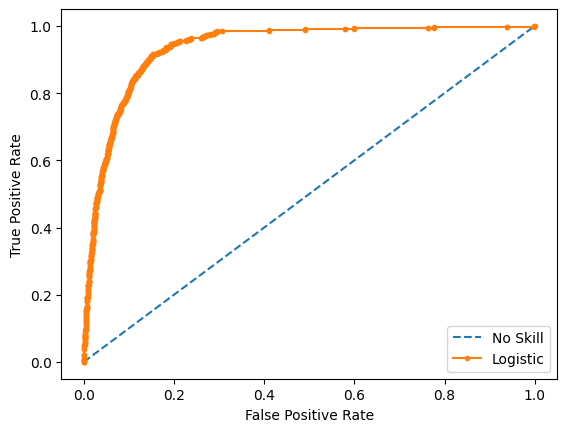

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.645326, G-Mean=0.961


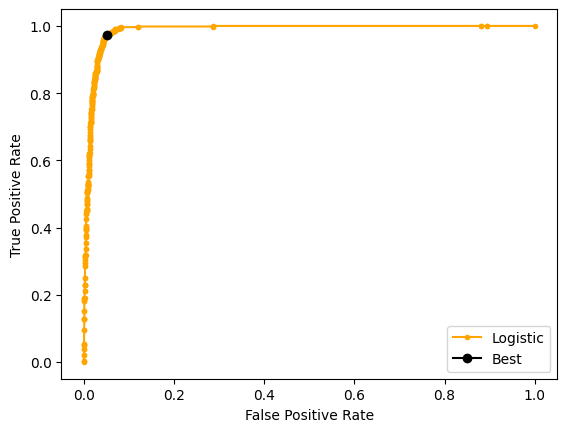

In [ ]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', color='orange', label='Logistic')
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.645326


###**Decision Tree (Upsampling)**

In [ ]:
upsampled_dt = DecisionTreeClassifier(criterion='entropy', class_weight = 'balanced', max_depth=6,min_samples_split= 2, splitter="random", random_state=0)
upsampled_dt.fit(X_train, y_train)

upsampled_pred_dt = upsampled_dt.predict(X_test)

In [ ]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, upsampled_pred_dt)*100))

Accuracy score: 83.55 %


In [ ]:
print(classification_report(y_test, upsampled_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7435
           1       0.28      0.88      0.43       565

    accuracy                           0.84      8000
   macro avg       0.64      0.85      0.67      8000
weighted avg       0.94      0.84      0.87      8000



In [ ]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, upsampled_pred_dt)*100))

F1 score: 42.93 %


In [ ]:
print(pd.DataFrame(confusion_matrix(y_test,upsampled_pred_dt)))

      0     1
0  6189  1246
1    70   495


In [ ]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, upsampled_pred_dt)*100))

Recall score: 87.61 %


In [ ]:
upsampled_pred_proba_dt = upsampled_dt.predict_proba(X_test)
dt_probs = upsampled_pred_proba_dt[:, 1]

In [ ]:
dt_auc = roc_auc_score(y_test, dt_probs)
print(dt_auc)

0.920605126435003


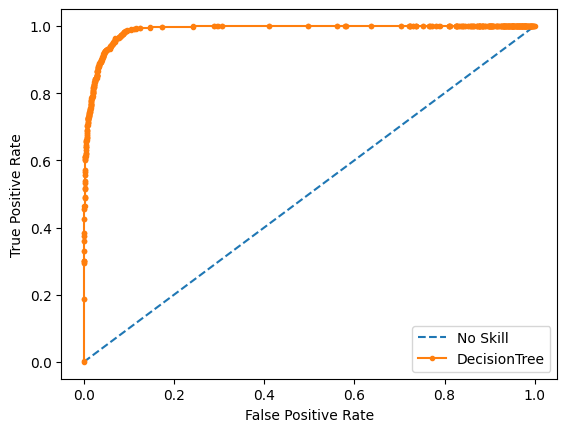

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, dt_probs)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='DecisionTree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, gmneas=%.2f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', color= 'orange', label='DecisionTree')
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

NameError: name 'sqrt' is not defined

###**Random Forest (Upsampling)**

In [ ]:
upsampled_rfc = RandomForestClassifier(n_estimators=30, class_weight = 'balanced', criterion='entropy', max_depth=14, min_samples_split=8, random_state=0)
upsampled_rfc.fit(X_train, y_train)

upsampled_pred_rfc = upsampled_rfc.predict(X_test)

In [ ]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, upsampled_pred_rfc)*100))

Accuracy score: 90.99 %


In [ ]:
print(classification_report(y_test, upsampled_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      7435
           1       0.44      0.99      0.61       565

    accuracy                           0.91      8000
   macro avg       0.72      0.94      0.78      8000
weighted avg       0.96      0.91      0.92      8000



In [ ]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, upsampled_pred_rfc)*100))

F1 score: 60.71 %


In [ ]:
print(pd.DataFrame(confusion_matrix(y_test,upsampled_pred_rfc)))

      0    1
0  6722  713
1     8  557


In [ ]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, upsampled_pred_rfc)*100))

Recall score: 98.58 %


In [ ]:
upsampled_pred_proba_rfc = upsampled_rfc.predict_proba(X_test)
rfc_probs = upsampled_pred_proba_rfc[:, 1]

In [ ]:
rfc_auc = roc_auc_score(y_test, rfc_probs)
print(rfc_auc)

0.9875206360731056


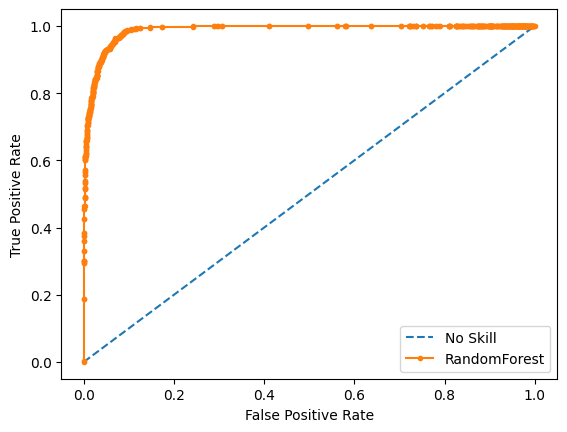

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_probs)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.645326, f1_score=0.61


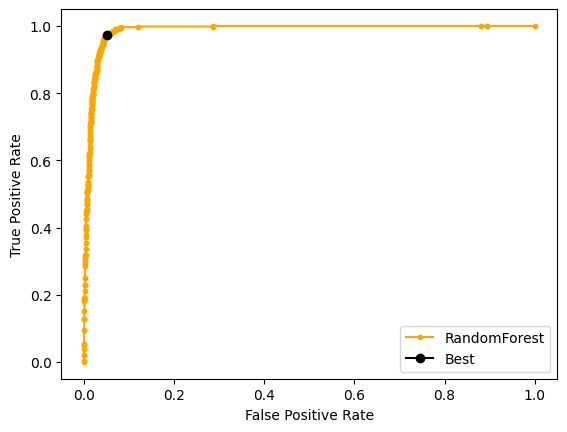

In [ ]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, gmeans=%.2f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', color= 'orange', label='RandomForest')
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

###**SVM Classifier (Upsampling)**

In [ ]:
sv = SVC(kernel="rbf", class_weight = 'balanced', random_state=0, probability=True)
sv.fit(X_train,y_train)

y_pred_sv = sv.predict(X_test)

In [ ]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_sv)*100))

Accuracy score: 84.16 %


In [ ]:
print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7435
           1       0.27      0.74      0.40       565

    accuracy                           0.84      8000
   macro avg       0.62      0.80      0.65      8000
weighted avg       0.93      0.84      0.87      8000



In [ ]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, y_pred_sv)*100))

F1 score: 39.87 %


In [ ]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred_sv)))

      0     1
0  6313  1122
1   145   420


In [ ]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, y_pred_sv)*100))

Recall score: 74.34 %


In [ ]:
upsampled_pred_proba_sv = sv.predict_proba(X_test)
sv_probs = upsampled_pred_proba_sv[:, 1]

In [ ]:
sv_auc = roc_auc_score(y_test, sv_probs)
print(sv_auc)

0.874501728847653


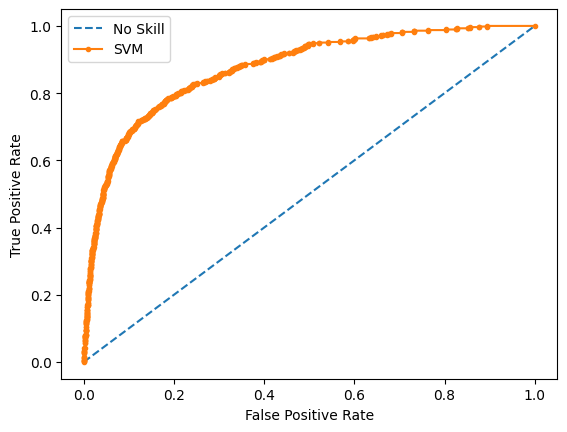

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, sv_probs)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='SVM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.645326, f1_score=0.40


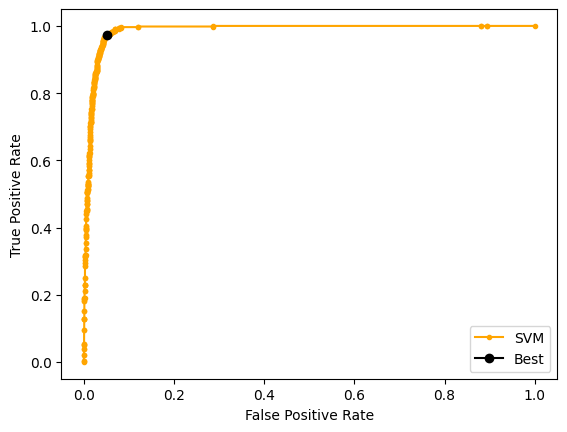

In [ ]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, gmeans=%.2f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', color= 'orange', label='SVM')
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

###**XGBoost Classifier (Upsampling)**

In [ ]:
xg = XGBClassifier(class_weight = 'balanced')
xg.fit(X_train,y_train)

y_pred_xg = xg.predict(X_test)

[21:25:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



In [ ]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_xg)*100))

Accuracy score: 92.83 %


In [ ]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      7435
           1       0.50      0.99      0.66       565

    accuracy                           0.93      8000
   macro avg       0.75      0.96      0.81      8000
weighted avg       0.96      0.93      0.94      8000



In [ ]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, y_pred_xg)*100))

F1 score: 66.12 %


In [ ]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred_xg)))

      0    1
0  6866  569
1     5  560


In [ ]:
upsampled_pred_proba_xg = xg.predict_proba(X_test)
xg_probs = upsampled_pred_proba_xg[:, 1]

In [ ]:
xg_auc = roc_auc_score(y_test,xg_probs)
print(xg_auc)

0.9868889669168189


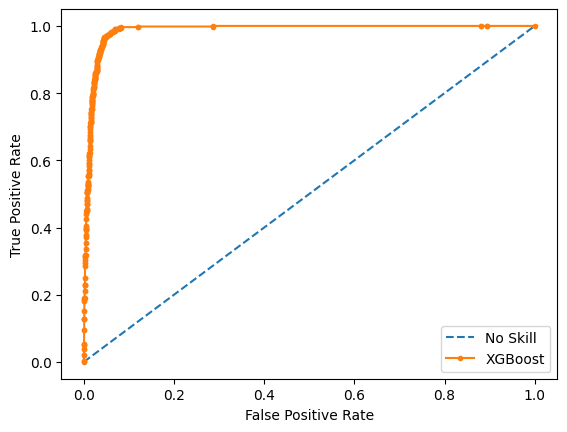

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, xg_probs)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
print(xg.best_iteration)

99


In [ ]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, f1_score=%.2f' % (thresholds[ix], f1_score(y_test, upsampled_pred_dt)))
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', color= 'orange', label='Logistic')
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

#**Cross Vaidation using GridSearch**

##**Logistic Regression Upsampling Cross Validation**

In [ ]:
params = {'C':[0.1,0.01,0.02,0.3,0.0015,1],'class_weight' : ['balanced'], 'solver':["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}
grid_search_Ulg = GridSearchCV(estimator= upsampled_lg, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_Ulg.fit(X_train, y_train)
best_accuracy_Ulg = grid_search_Ulg.best_score_
best_params_Ulg = grid_search_Ulg.best_params_
print("Best f1_Score for Upsampling Logistisc regression: {:.2f}%".format(best_accuracy_Ulg*100))
print("Best params for Upsampling Logistisc regression: ",best_params_Ulg)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best F1_Score for Upsampling Logistisc regression: 86.47%
Best params for Upsampling Logistisc regression:  {'C': 1, 'class_weight': 'balanced', 'solver': 'newton-cg'}


In [ ]:
accuracies_Ulg = cross_val_score(estimator = upsampled_lg, X = X_train, y = y_train, cv = 5)
print("Upsampled Logistic Regression Accuracy: {:.2f} %".format(accuracies_Ulg.mean()*100))
print("Upsampled Logistic Regression Standard Deviation: {:.2f} %".format(accuracies_Ulg.std()*100))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Lib

Upsampled Logistic Regression Accuracy: 86.51 %
Upsampled Logistic Regression Standard Deviation: 0.20 %


##**DecisionTree Upsampling Cross Validation**

In [ ]:
params = {'max_depth': [4,5,6,7,8,9,10,12,14,20,50],'class_weight' : ['balanced'], 'criterion':['entropy','gini'], 'splitter':["random","best"], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_dt = GridSearchCV(estimator= upsampled_dt, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_dt.fit(X_train, y_train)
best_accuracy_dt = grid_search_dt.best_score_
best_params_dt = grid_search_dt.best_params_
print("Best f1_Score for DecisionTree: {:.2f}%".format(best_accuracy_dt*100))
print("Best params for DecisionTree: ",best_params_dt)

Best Accuracy for DecisionTree: 96.35%
Best params for DecisionTree:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
accuracies_Udt = cross_val_score(estimator = upsampled_dt, X = X_train, y = y_train, cv = 5)
print("Upsampled DecisionTree Accuracy: {:.2f} %".format(accuracies_Udt.mean()*100))
print("Upsampled DecisionTree Standard Deviation: {:.2f} %".format(accuracies_Udt.std()*100))

Upsampled DecisionTree Accuracy: 85.46 %
Upsampled DecisionTree Standard Deviation: 0.37 %


##**RandomForest Upsampling Cross Validation**

In [ ]:
params = {'n_estimators': [10, 20, 25, 50, 100],'class_weight' : ['balanced'], 'max_depth': [4,5,6,7,8,9,10,12,14,20,50], 'criterion':['entropy','gini'], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_rd = GridSearchCV(estimator= upsampled_rfc, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_rd.fit(X_train, y_train)
best_accuracy_rd = grid_search_rd.best_score_
best_params_rd = grid_search_rd.best_params_
print("Best f1_Score for RandomForest: {:.2f}%".format(best_accuracy_rd*100))
print("Best params for RandomForest: ",best_params_rd)

Best f1_Score for RandomForest: 96.84%
Best params for RandomForest:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
accuracies_Urfc = cross_val_score(estimator = upsampled_rfc, X = X_train, y = y_train, cv = 5)
print("Upsampled Random Forest Accuracy: {:.2f} %".format(accuracies_Urfc.mean()*100))
print("Upsampled Random Forest Standard Deviation: {:.2f} %".format(accuracies_Urfc.std()*100))

Upsampled Random Forest Accuracy: 92.68 %
Upsampled Random Forest Standard Deviation: 0.20 %


##**SVM Upsampling Cross Validation**

In [ ]:
params = {'kernel': ["linear","poly", "rbf", "sigmoid"],'class_weight' : ['balanced'],'gamma':["scale"], 'decision_function_shape' : ["ovo"]}
grid_search_sv = GridSearchCV(estimator= sv, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_sv.fit(X_train, y_train)
best_accuracy_sv = grid_search_sv.best_score_
best_params_sv = grid_search_sv.best_params_
print("Best f1_score for SVM: {:.2f}%".format(best_accuracy_sv*100))
print("Best params for SVM: ",best_params_sv)

59010.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
59010.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
59010.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
59010.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01

KeyboardInterrupt: 

In [ ]:
accuracies_Usv = cross_val_score(estimator = sv, X = X_train, y = y_train, cv = 5)
print("Upsampled SVM Accuracy: {:.2f} %".format(accuracies_Usv.mean()*100))
print("Upsampled SVM Standard Deviation: {:.2f} %".format(accuracies_Usv.std()*100))

##**Weighting**

In [ ]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train)
print(model.feature_importances_)